In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [69]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
total_jobs = len(df_DA_US)
df_DA_US = df_DA_US.explode('job_skills')

In [70]:
df_top_skills = df_DA_US.groupby(by='job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
).sort_values(by='skill_count', ascending=False).head(10)
df_top_skills = df_top_skills.sort_values(by='median_salary', ascending=False)

In [71]:
df_top_skills['skill_percent'] = 100 * df_top_skills['skill_count'] / total_jobs

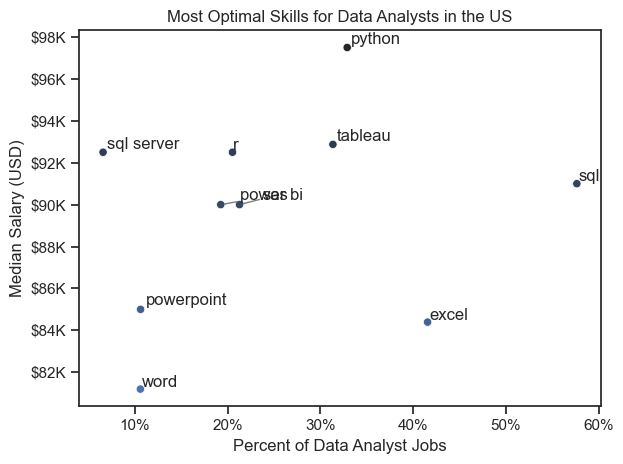

In [72]:
from adjustText import adjust_text

sns.set_theme(style='ticks')
texts=[]
sns.scatterplot(data=df_top_skills, x='skill_percent', y='median_salary', hue='median_salary', palette='dark:b_r')
for i, txt in enumerate(df_top_skills.index):
    texts.append(plt.text(df_top_skills['skill_percent'].iloc[i], df_top_skills['median_salary'].iloc[i], "" + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.title("Most Optimal Skills for Data Analysts in the US")
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (USD)')
plt.legend().remove()

from matplotlib.ticker import FuncFormatter 
from matplotlib.ticker import PercentFormatter

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

In [73]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates().dropna()

technology_dict = {}
for row in df_technology:
   row_dict = ast.literal_eval(row)
   for key, value in row_dict.items():
      if key in technology_dict:
         technology_dict[key] += value
      else:
         technology_dict[key] = value

for key, value in technology_dict.items():
   technology_dict[key] = list(set(value))

In [74]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')

In [75]:
df_plot = df_top_skills.merge(df_technology, left_on='job_skills', right_on='skills')

In [80]:
df_plot

,median_salary,skill_count,skill_percent,technology,skills
0,97500.00,1431,32.896552,programming,python
1,92875.00,1364,31.356322,analyst_tools,tableau
2,92500.00,893,20.528736,programming,r
3,92500.00,286,6.574713,databases,sql server
4,91000.00,2508,57.655172,programming,sql
5,90000.00,926,21.287356,analyst_tools,sas
6,90000.00,926,21.287356,programming,sas
7,90000.00,838,19.264368,analyst_tools,power bi
8,85000.00,462,10.620690,analyst_tools,powerpoint
9,84392.00,1808,41.563218,analyst_tools,excel


5 [-0.08041046 -0.86506276]
6 [0.14473942 0.47166662]


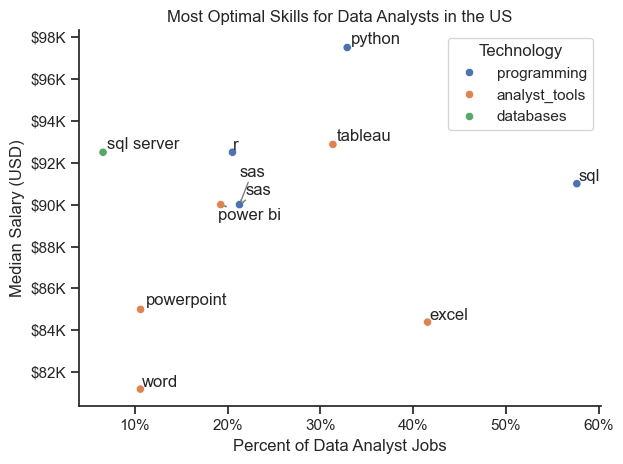

In [81]:
from adjustText import adjust_text

sns.set_theme(style='ticks')
texts=[]
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
sns.despine()

for i, txt in enumerate(df_plot['skills']):
    texts.append(plt.text(df_plot['skill_percent'].iloc[i], df_plot['median_salary'].iloc[i], "" + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.title("Most Optimal Skills for Data Analysts in the US")
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (USD)')
plt.legend(title='Technology')

from matplotlib.ticker import FuncFormatter 
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()